In [ ]:
# Install a pip package in the current Jupyter kernel
# import sys
# !{sys.executable} -m pip install pngcrush


In [8]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors

import cmocean.cm as cm
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cimgt
import glob
import json


In [ ]:
import basemap



In [ ]:
ind = '201512'

In [ ]:
# for i in range(11):
#     i = i + 1
#     data = xr.open_dataset('monthly/ct5km_ssta-mean_v3.1_2015' + str("{:02d}".format(i)) + '.nc')
#     ax = plt.axes(projection=ccrs.PlateCarree())
#     # ax.coastlines()
#     temp = np.ma.masked_invalid(data.sea_surface_temperature_anomaly.values[0,::5,::5])
#     if i == 1 : 
#         lon = np.ma.masked_outside(data.lon.values[::5],  -180, 180)
#         lat = np.ma.masked_outside(data.lat.values[::5],  -90, 90)
    
#     plt.axis('off')
#     plt.margins(0,0)
#     plt.gca().xaxis.set_major_locator(plt.NullLocator())
#     plt.gca().yaxis.set_major_locator(plt.NullLocator())
#     plt.tick_params(axis='both', left='False', top='False', right='False', bottom='False', labelleft='False', labeltop='False', labelright='False', labelbottom='False')
#     # ax.stock_img()
#     plt.pcolor(lon, lat, temp, vmin=-4, vmax=4, cmap=cm.balance)
#     ax.add_feature(cfeature.LAND,color='grey')
#     ax.set_facecolor('white')

#     plt.savefig('ssta2015' + str("{:02d}".format(i)) + '.png', dpi=300, facecolor=ax.get_facecolor(),bbox_inches='tight', pad_inches = 0)
#     data.close()

In [ ]:
with open('buoys.json') as f:
    dataIn = json.load(f)
    a = {}
    for rows in dataIn:
        lat_i = geo_idx(rows['lat'], lats)
        lon_i = geo_idx(rows['lon'], lons)
#         print(lat_i, type(lon_i))
#         print(temp[:,lat_i,lon_i].values.tolist())
        key = 'ct5km_ssta_v3.1_20150702.nc'[-11:-3]
        a.setdefault(key, [])
        val = temp[:,lat_i,lon_i].values.tolist()[0]
        a[key].append(val)
        print(val)
#         a["abc"] = 1
    
    with open('satBuoy.json', 'w') as fp:
        json.dump(a, fp)
        
#         print(temp[:,lat_i,lons_i].values,rows['lat'],rows['lon'])
        

In [ ]:
'ct5km_ssta_v3.1_20150702.nc'[-11:-3]

In [ ]:
def geo_idx(dd, dd_array):
   """
     search for nearest decimal degree in an array of decimal degrees and return the index.
     np.argmin returns the indices of minium value along an axis.
     so subtract dd from all values in dd_array, take absolute value and find index of minium.
    """
   geo_idx = (np.abs(dd_array - dd)).argmin()
   return geo_idx

In [ ]:
lons = np.ma.masked_outside(data.lon.values[::res],  -180, 180)
lats = np.ma.masked_outside(data.lat.values[::res],  -90, 90)
temp = data.heatwave_category.values[0,::res,::res]
temp = data.variables['heatwave_category'][:,:,:]
temp

In [ ]:
lat_i = geo_idx(2818, lats)
lons_i = geo_idx(882, lons)
print(temp[:,lat_i,lons_i].values)

In [ ]:
lats[2818]

In [ ]:
dataset = dataElev
sst = np.ma.masked_outside(dataset.variables['data'][0, :, :],-.0001,30000)

lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]

# ax = plt.axes(projection=ccrs.PlateCarree())

ortho = ccrs.Orthographic(central_longitude=-123, central_latitude=48)
ax = plt.axes(projection=ortho)

plt.pcolormesh(lons, lats, sst,
             transform=ccrs.PlateCarree(),cmap='gray')
ax.set_global() 
ax.add_feature(cfeature.COASTLINE, lw=.15)
# ax.coastlines()
plt.savefig('raw.png', dpi=1200, facecolor=ax.get_facecolor(),bbox_inches='tight', pad_inches = 0)

plt.show()

In [7]:
cmaps = cm.cmap_d



NameError: name 'cm' is not defined

In [ ]:

dataElev

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree())

temp = np.ma.masked_invalid(data.sea_surface_temperature_anomaly.values[0,:,:])[::5,::5]

lon = np.ma.masked_outside(data.lon.values[::5],  -180, 180)
lat = np.ma.masked_outside(data.lat.values[::5],  -90, 90)
plt.axis('off')
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.tick_params(axis='both', left='False', top='False', right='False', bottom='False', labelleft='False', labeltop='False', labelright='False', labelbottom='False')
# ax.stock_img()
plt.pcolormesh(lon, lat, temp, vmin=-4, vmax=4, cmap=cm.balance)
ax.add_feature(cfeature.LAND)
ax.set_facecolor('white')




plt.savefig('tt.png', dpi=300, facecolor=ax.get_facecolor(),bbox_inches='tight', pad_inches = 0)



In [ ]:
np.ma.masked_outside(dataElev.variables['elevation'],-1,5000)

da = data[variable_name]

In [ ]:
# see how many files for this year need to be produced.
subfolder = 'daily/2017/'
nc_files = glob.glob(subfolder + '*.nc')
png_files = glob.glob(subfolder + '*.png')
remaining = set([x[:-2] for x in _files]) - set([y[:-3] for y in png_files])
files_to_open = [item + 'nc' for item in remaining]
res = 2
for file in nc_files[100:104]:
    with xr.open_dataset(file) as data:
        temp = data.sea_surface_temperature_anomaly.values[0,::res,::res]
        print(temp)

In [ ]:
data = xr.open_dataset('noaa-crw_mhw_v1.0.1_category_20190902.nc')


data['time'][0].values

In [ ]:
mask_lon = (data.heatwave_category >= 5)
data1 = data.where(mask_lon, drop=True)
data1

In [ ]:
with open('buoys.json') as f:
    dataIn = json.load(f)
    a = {}
    for rows in dataIn:
        lat_i = geo_idx(rows['lat'], lats)
        lon_i = geo_idx(rows['lon'], lons)
#         print(lat_i, type(lon_i))
#         print(temp[:,lat_i,lon_i].values.tolist())
        key = 'ct5km_ssta_v3.1_20150702.nc'[-11:-3]
        a.setdefault(key, [])
        val = temp[:,lat_i,lon_i].values.tolist()[0]
        a[key].append(val)
        print(val)
#         a["abc"] = 1
    
    with open('satBuoy.json', 'w') as fp:
        json.dump(a, fp)
        
#         print(temp[:,lat_i,lons_i].values,rows['lat'],rows['lon'])

In [18]:
subfolder = 'daily_mhw/2021/'
nc_files = glob.glob(subfolder + '*.nc')
png_files = glob.glob(subfolder + '*.png')
remaining = set([x[:-2] for x in nc_files]) - set([y[:-3] for y in png_files])
files_to_open = [item + 'nc' for item in remaining]
# files_to_open = [item for item in nc_files]
get_latlong = True
res = 1
# ortho = ccrs.Orthographic(central_longitude=-139, central_latitude=32)
# ax = plt.axes(projection=ortho)
# ax = plt.axes(projection=ccrs.PlateCarree())
# Generate Map Image for each single netCDF

# fname = '2k_earth_daymap.jpg'
# img = plt.imread(fname)
img_extent = (-180, 180, -90, 90)

min_lon = -180
max_lon = -50

min_lat = -20

max_lat = 90



# antimeridian fix
mmin_lon = 130
mmax_lon = 180

# northern lats
mmin_lat = 70

def write_json(new_data, filename='satBuoy.json'):
    with open(filename,'r+') as file:
          # First we load existing data into a dict.
        file_data = json.load(file)
        # Join new_data with file_data inside emp_details
        file_data.update(new_data)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file, indent = 4)

# sort files
def last_4chars(x):
    return(x[-10:])

def geo_idx(dd, dd_array):
   """
     search for nearest decimal degree in an array of decimal degrees and return the index.
     np.argmin returns the indices of minium value along an axis.
     so subtract dd from all values in dd_array, take absolute value and find index of minium.
    """
   geo_idx = (np.abs(dd_array - dd)).argmin()
   return geo_idx

with open('buoys.json') as f:
    dataIn = json.load(f)
    a = {}
#     for rows in dataIn:
#         lat_i = geo_idx(rows['lat'], lats)
#         lon_i = geo_idx(rows['lon'], lons)

    files = sorted(nc_files, key = last_4chars)  
    for file in files[10:100]:

        with xr.open_dataset(file) as data:

            key = file[-11:-3]
            a.setdefault(key, [])

            data = data#.where(mask_lon & mask_lat, drop=True)

            temp = np.ma.masked_outside(data.heatwave_category.values[0,::res,::res],-1,5)
            tempV = data.variables['heatwave_category'][:,:,:]

    #         with open('buoys.json') as f:
    #             dataIn = json.load(f)
    #             a = {}
          

    #         temp1 = data1.heatwave_category.values[0,::res,::res]
    #         temp2 = data2.heatwave_category.values[0,::res,::res]
    #         print(temp2)
    #         if get_latlong : 
            lon = np.ma.masked_outside(data.lon.values[::res],  -180, 180)
            lat = np.ma.masked_outside(data.lat.values[::res],  -90, 90)
            
            for rows in dataIn:
                lat_i = geo_idx(rows['lat'], lat)
                lon_i = geo_idx(rows['lon'], lon)
                val = tempV[:,lat_i,lon_i].values.tolist()[0]
                a[key].append(val)
            write_json(a)
                
#             fig = plt    
#             ax = fig.axes(projection=ccrs.PlateCarree())


#             fig.axis('off')
#             fig.margins(0,0)
#             fig.gca().xaxis.set_major_locator(plt.NullLocator())
#             fig.gca().yaxis.set_major_locator(plt.NullLocator())
#             fig.tick_params(axis='both', left='False', top='False', right='False', bottom='False', labelleft='False', labeltop='False', labelright='False', labelbottom='False')
#             # ax.stock_img()
#             norm=plt.Normalize(-2,5)
#             cmap = matplotlib.colors.ListedColormap(["white","lightblue","#FEDB67", "#f26722", "#cd3728", "#7E1416"])


#             fig.pcolormesh(lon, lat, temp, vmin=-2, vmax=5,cmap=cmap)

#             ax.set_extent([-180, 180, -90, 90])


#             fig.savefig(file[:-3]+'.png',transparent=True, dpi=500,bbox_inches='tight', pad_inches = 0)
#     #         plt.close("all")
#             data.close()
#             fig.clf()
#             plt.close()
            
    
#     with open('satBuoy.json', 'w') as fp:
#         dataAll = json.load(fp)
#         dataAll.update(a)
#         json.dump(dataAll)


ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'scipy']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
http://xarray.pydata.org/en/stable/getting-started-guide/installing.html
http://xarray.pydata.org/en/stable/user-guide/io.html

FileNotFoundError: [Errno 2] No such file or directory: '2k_earth_daymap.jpg'

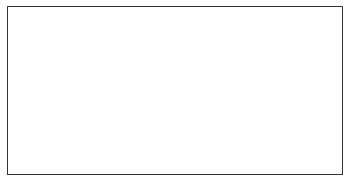

In [14]:
## Create black and white texture for displacement map

subfolder = 'daily/2015/'
nc_files = glob.glob(subfolder + '*.nc')
png_files = glob.glob(subfolder + '*.png')
remaining = set([x[:-2] for x in nc_files]) - set([y[:-3] for y in png_files])
files_to_open = [item + 'nc' for item in remaining]
# files_to_open = [item for item in nc_files]
get_latlong = True
res = 2
ortho = ccrs.Orthographic(central_longitude=-139, central_latitude=32)
# ax = plt.axes(projection=ortho)
ax = plt.axes(projection=ccrs.PlateCarree())
# Generate Map Image for each single netCDF

fname = '2k_earth_daymap.jpg'
img = plt.imread(fname)
img_extent = (-180, 180, -90, 90)



for file in nc_files[0:10]:
    with xr.open_dataset('daily/2015/ct5km_ssta_v3.1_20150702.nc') as data:
        #ax = plt.axes(projection=ccrs.PlateCarree())
        # ax.coastlines()
        temp = data.sea_surface_temperature_anomaly.values[0,::res,::res]
        if get_latlong : 
            lon = np.ma.masked_outside(data.lon.values[::res],  -180, 180)
            lat = np.ma.masked_outside(data.lat.values[::res],  -90, 90)
            topo = np.ma.masked_outside(dataElev.variables['elevation'],0.1,5000)
            lats = dataElev.variables['latitude'][:]
            lons = dataElev.variables['longitude'][:]
            get_latlong = False
        fig = plt    
#         ax = fig.axes(projection=ortho)

        fig.axis('off')
        fig.margins(0,0)
        fig.gca().xaxis.set_major_locator(plt.NullLocator())
        fig.gca().yaxis.set_major_locator(plt.NullLocator())
        fig.tick_params(axis='both', left='False', top='False', right='False', bottom='False', labelleft='False', labeltop='False', labelright='False', labelbottom='False')
        # ax.stock_img()
        
        
        fig.pcolormesh(lons, lats, topo,vmin=.01,vmax=10000,cmap='gray')
#         fig.pcolormesh(lon, lat, temp, vmin=-4, vmax=4,cmap=cm.gray)
#         ax.add_feature(cfeature.LAND,color='grey')
        ax.set_facecolor([0.4416302300065532, 0.43973773571730596, 0.4376579437864427])
#         ax.imshow(img,extent=img_extent)
        

        fig.savefig(file[:-3]+'.png', dpi=500, facecolor=ax.get_facecolor(),bbox_inches='tight', pad_inches = 0)
#         plt.close("all")
        data.close()
        fig.clf()
        plt.close()


In [ ]:
### HIGH RES background map with tranparent background
subfolder = 'daily/2015/'
nc_files = glob.glob(subfolder + '*.nc')
png_files = glob.glob(subfolder + '*.png')
remaining = set([x[:-2] for x in nc_files]) - set([y[:-3] for y in png_files])
files_to_open = [item + 'nc' for item in remaining]
# files_to_open = [item for item in nc_files]
get_latlong = True
res = 2
# ortho = ccrs.Orthographic(central_longitude=-139, central_latitude=32)
# ax = plt.axes(projection=ortho)
# ax = plt.axes(projection=ccrs.PlateCarree())
# Generate Map Image for each single netCDF

fname = '2k_earth_daymap.jpg'
img = plt.imread(fname)
img_extent = (-180, 180, -90, 90)

min_lon = -180
max_lon = -50

min_lat = -20

max_lat = 90



# antimeridian fix
mmin_lon = 120
mmax_lon = 180

# northern lats
mmin_lat = 60
data = dataElev
dataDub = dataElev
dataDub2 = dataElev
mask_lon = (data.longitude >= min_lon) & (data.longitude <= max_lon) #| ((data.lon >= mmin_lon) & (data.lon <= mmax_lon))
mask_lat = (data.latitude >= min_lat) & (data.latitude <= max_lat)
mask_lon1 = (dataDub.longitude >= mmin_lon) & (dataDub.longitude <= mmax_lon)
mask_lat1 = (dataDub2.latitude >= mmin_lat) & (dataDub2.latitude <= max_lat)

data = data.where(mask_lon & mask_lat, drop=True)

data1 = dataDub.where(mask_lon1 & mask_lat, drop=True)

data2 = dataDub2.where(mask_lat1, drop=True)

# for file in nc_files[1:2]:
#     with xr.open_dataset('daily/2015/ct5km_ssta_v3.1_20150702.nc') as data1:
        #ax = plt.axes(projection=ccrs.PlateCarree())
        # ax.coastlines()
#         temp = data.sea_surface_temperature_anomaly.values[0,::res,::res]
#         if get_latlong : 
#             lon = np.ma.masked_outside(data.lon.values[::res],  -180, 180)
#             lat = np.ma.masked_outside(data.lat.values[::res],  -90, 90)
#             topo = np.ma.masked_outside(dataElev.variables['elevation'],0.1,9000)
topo = np.ma.masked_outside(data.variables['elevation'],0.1,9000)
topo1 = np.ma.masked_outside(data1.variables['elevation'],0.1,9000)
topo2 = np.ma.masked_outside(data2.variables['elevation'],0.1,9000)
#             lats = dataElev.variables['latitude'][:]
#             lons = dataElev.variables['longitude'][:]
lon = data.variables['longitude'][:]
lat = data.variables['latitude'][:]
lon1 = data1.variables['longitude'][:]
lat1 = data1.variables['latitude'][:]
lon2 = data2.variables['longitude'][:]
lat2 = data2.variables['latitude'][:]
fig = plt    
ax = fig.axes(projection=ccrs.PlateCarree())
fig.axis('off')
fig.margins(0,0)
fig.gca().xaxis.set_major_locator(plt.NullLocator())
fig.gca().yaxis.set_major_locator(plt.NullLocator())
fig.tick_params(axis='both', left='False', top='False', right='False', bottom='False', labelleft='False', labeltop='False', labelright='False', labelbottom='False')
# ax.stock_img()
fig.pcolormesh(lon, lat, topo, vmin=0.1,vmax=9000,cmap='gray')
fig.pcolormesh(lon1, lat1, topo1, vmin=0.1,vmax=9000,cmap='gray')
fig.pcolormesh(lon2, lat2, topo2, vmin=0.1,vmax=9000,cmap='gray')
        
        
#         fig.pcolormesh(lons, lats, topo,vmin=0.1,vmax=9000,cmap='gray')
#         fig.pcolormesh(lon, lat, temp, vmin=-4, vmax=4,cmap=cm.balance)
#         ax.add_feature(cfeature.LAND,color='grey')
#         ax.set_facecolor([0.0, 1.0, 0.0, 0])
#         ax.imshow(img,extent=img_extent)
        
ax.set_extent([-180, 180, -90, 90])

fig.savefig('BC_terrain'+'.png', dpi=1101.07526882,  transparent=True,bbox_inches='tight', pad_inches = 0)
#         plt.close("all")
data.close()
fig.clf()
plt.close()


In [ ]:
### BC Only 
subfolder = 'daily/2015/'
nc_files = glob.glob(subfolder + '*.nc')
png_files = glob.glob(subfolder + '*.png')
remaining = set([x[:-2] for x in nc_files]) - set([y[:-3] for y in png_files])
files_to_open = [item + 'nc' for item in remaining]
# files_to_open = [item for item in nc_files]
get_latlong = True
res = 2
# ortho = ccrs.Orthographic(central_longitude=-139, central_latitude=32)
# ax = plt.axes(projection=ortho)
# ax = plt.axes(projection=ccrs.PlateCarree())
# Generate Map Image for each single netCDF

fname = '2k_earth_daymap.jpg'
img = plt.imread(fname)
img_extent = (-180, 180, -90, 90)

min_lon = -180
max_lon = -50

min_lat = -20

max_lat = 90



# antimeridian fix
mmin_lon = 120
mmax_lon = 180

# northern lats
mmin_lat = 60
data = dataElev
dataDub = dataElev
dataDub2 = dataElev
mask_lon = (data.longitude >= min_lon) & (data.longitude <= max_lon) #| ((data.lon >= mmin_lon) & (data.lon <= mmax_lon))
mask_lat = (data.latitude >= min_lat) & (data.latitude <= max_lat)
mask_lon1 = (dataDub.longitude >= mmin_lon) & (dataDub.longitude <= mmax_lon)
mask_lat1 = (dataDub2.latitude >= mmin_lat) & (dataDub2.latitude <= max_lat)

data = data.where(mask_lon & mask_lat, drop=True)

data1 = dataDub.where(mask_lon1 & mask_lat, drop=True)

data2 = dataDub2.where(mask_lat1, drop=True)

# for file in nc_files[1:2]:
#     with xr.open_dataset('daily/2015/ct5km_ssta_v3.1_20150702.nc') as data1:
        #ax = plt.axes(projection=ccrs.PlateCarree())
        # ax.coastlines()
#         temp = data.sea_surface_temperature_anomaly.values[0,::res,::res]
#         if get_latlong : 
#             lon = np.ma.masked_outside(data.lon.values[::res],  -180, 180)
#             lat = np.ma.masked_outside(data.lat.values[::res],  -90, 90)
#             topo = np.ma.masked_outside(dataElev.variables['elevation'],0.1,9000)
topo = np.ma.masked_outside(data.variables['elevation'],0.1,9000)
topo1 = np.ma.masked_outside(data1.variables['elevation'],0.1,9000)
topo2 = np.ma.masked_outside(data2.variables['elevation'],0.1,9000)
#             lats = dataElev.variables['latitude'][:]
#             lons = dataElev.variables['longitude'][:]
lon = data.variables['longitude'][:]
lat = data.variables['latitude'][:]
lon1 = data1.variables['longitude'][:]
lat1 = data1.variables['latitude'][:]
lon2 = data2.variables['longitude'][:]
lat2 = data2.variables['latitude'][:]
fig = plt    
ax = fig.axes(projection=ccrs.PlateCarree())
fig.axis('off')
fig.margins(0,0)
fig.gca().xaxis.set_major_locator(plt.NullLocator())
fig.gca().yaxis.set_major_locator(plt.NullLocator())
fig.tick_params(axis='both', left='False', top='False', right='False', bottom='False', labelleft='False', labeltop='False', labelright='False', labelbottom='False')
# ax.stock_img()
fig.pcolormesh(lon, lat, topo, vmin=0.1,vmax=9000,cmap='gray')
fig.pcolormesh(lon1, lat1, topo1, vmin=0.1,vmax=9000,cmap='gray')
fig.pcolormesh(lon2, lat2, topo2, vmin=0.1,vmax=9000,cmap='gray')
        
        
#         fig.pcolormesh(lons, lats, topo,vmin=0.1,vmax=9000,cmap='gray')
#         fig.pcolormesh(lon, lat, temp, vmin=-4, vmax=4,cmap=cm.balance)
#         ax.add_feature(cfeature.LAND,color='grey')
#         ax.set_facecolor([0.0, 1.0, 0.0, 0])
#         ax.imshow(img,extent=img_extent)
        
ax.set_extent([-180, 180, -90, 90])

fig.savefig('BC_terrain'+'.png', dpi=1101.07526882,  transparent=True,bbox_inches='tight', pad_inches = 0)
#         plt.close("all")
data.close()
fig.clf()
plt.close()


In [ ]:
 dataElev = xr.open_dataset('GMTED2010_15n015_00625deg.nc',decode_times=False)
# dataElev = xr.open_dataset('topo_20.1.nc',decode_times=False)
# min_lon = -180
# max_lon = -60
# mmin_lon = 100
# mmax_lon = 180
# min_lat = 0
# max_lon = -60
# max_lat = 90

# mask_lon = ((dataElev.lon >= min_lon) & (dataElev.lon <= max_lon)) | ((dataElev.lon >= mmin_lon) & (dataElev.lon <= mmax_lon))
# mask_lat =  (dataElev.lat >= min_lat) & (dataElev.lat <= max_lat)
# dataElev = dataElev.where(mask_lon & mask_lat, drop=True)